# <font color='royalblue'>Analysing Exit Surveys from DETE and TAFE</font>

In this analysis, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The original TAFE exit survey data is no longer available. Some slight modifications were made to the original datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

We will *combine the results for both surveys* and find out the patterns behind the questions below,

<blockquote><font color='royalblue'>
Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

</font></blockquote>

A data dictionary wasn't provided with the dataset so we'll use our general knowledge to define the columns in this project.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

Let's start with inspecting the DETE data.

----

# <font color='royalblue'>Inspecting DETE data</font>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import data
dete_survey = pd.read_csv('dete_survey.csv')

#inspect data
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

## <font color='royalblue'>DETE Observations</font>

DETE survey has **882 rows and 55 columns**, of which there are a few rows with null values and many columns that we do not need to complete our analysis that we may consider dropping. 

In analysing our first question, 
* we are interested in the **time period** i.e. `DETE Start Date` and `Cease Date` as well as the **job dissatifaction columns** such between column 10 `Career move to public sector` to column 27 `None of the above` which are identified as boolean entries.

* Column 28 `Professional Development` to 41 `Feedback` seems to be useful information as well which we should inspect further as they appear to be string based **categorical feedback**.

Let's dig deeper into time period, followed by the categorical feedbacks.

In [5]:
dete_survey['DETE Start Date'].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
1970          21
2013          21
1975          21
2005          20
1990          20
1996          19
1999          19
2000          18
1992          18
2004          18
1991          18
1989          17
1976          15
2002          15
1978          15
2003          15
1988          15
1974          14
1980          14
1995          14
1998          14
1997          14
1979          14
1993          13
1986          12
1972          12
1977          11
1971          10
2001          10
1984          10
1969          10
1994          10
1981           9
1983           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: DETE Start Date, dtype: int64

In [6]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
07/2014         2
08/2012         2
04/2013         2
02/2014         2
11/2012         1
09/2010         1
2010            1
2014            1
07/2012         1
09/2014         1
07/2006         1
Name: Cease Date, dtype: int64

## DETE data - handling null values

Both time period have no null values but `Not Stated` is being used in place of `NaN`. We will need to replace these with `NaN` by importing the csv again with `na_values` parameter set.

We can also see that in `Cease Date` month is being expressed. Since there is no information of month for `DETE Start Date`, for ease of computing duration of employment, we may consider a seperate column for `Cease Date Year` later.

In [7]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

#check if NaN updated
dete_survey['DETE Start Date'].isnull().sum()

73

## DETE data - inspect categorical feedbacks

In [8]:
#categorical feedbacks 
dete_survey.iloc[:,28:42]

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback
0,A,A,N,N,N,A,A,A,A,N,N,N,A,A
1,A,A,N,N,N,N,A,A,A,N,N,N,A,A
2,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,A,A,A,A
4,A,A,N,N,D,D,N,A,A,A,A,A,A,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,SA,N,D,D,A,N,N,D,A,N,A,A,N,SA
818,A,SA,D,D,D,A,A,N,A,N,A,A,N,A
819,A,A,A,A,A,D,N,A,A,A,A,A,A,A
820,A,D,D,A,SD,SD,SD,A,D,SD,SD,D,A,A


In [9]:
dete_survey['Professional Development'].value_counts()

A     413
SA    184
N     103
D      60
SD     33
M      15
Name: Professional Development, dtype: int64

## DETE data - dropping columns

The categorical feedbacks seem to be listed in acronyms of `Agree`, `Strongly Agree` etc, But because these seem to be secondary factors, we can explore later if need to, as such we will proceed to remove them from our analysis.


In [10]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

#check data size
dete_survey_updated.shape

(822, 35)

# <font color='royalblue'>Inspecting TAFE data</font>

In [11]:
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [12]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# <font color='royalblue'>TAFE Observations</font>

The TAFE data has **702 rows and 72 columns**, many of which has null values already listed as `NaN`. 

Similarly, we are only interested in time period i.e. `LengthofServiceOverall. Overall Length of Service at Institute (in years) ` and `Reason for ceasing employment` and `Contributing Factors` columns ranging from column 4 to 16.

----


# <font color='royalblue'>Data Cleaning</font>

## TAFE data - dropping columns

Columns 17 to 65 are also intriguing if we want to dig deeper, as we can see they are made up of answers with `Strongly Agree`, `Agree` type of sentiments. However, as we have dropped these type of column for DETE data, we will also drop them to reduce the size of the analysis for now.


In [13]:
#categorical feedbacks to be dropped
tafe_survey.iloc[:5,17:30]

,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently
0,NaN,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
1,NaN,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,Agree
2,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Neutral
3,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
4,NaN,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree


In [14]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

#check data size
tafe_survey_updated.shape

(702, 23)

## Column names standardization

Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis.

**DETE Survey**
* ID
* SeperationType
* Cease Date
* DETE Start Date
* Age
* Gender

**TAFE Survey**
* Record ID
* Reason for ceasing employment
* CESSATION YEAR
* LengthofServiceOverall.Overall Length of Service at Institute (in years)
* CurrentAge.Current Age
* Gender. What is your Gender?

We will have to standardize the column names in order to combine them later.
We will clean up the column names of `dete_survey_updated` with conventions(lowercase, underscore, no blank spaces) and rename the columns of `tafe_survey_updated` to match.

In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ', '_').str.strip()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
rename_columns = {'Record ID':'id',
                 'CESSATION YEAR': 'cease_date',
                 'Reason for ceasing employment':'separationtype',
                 'Gender.What is your Gender?':'gender',
                 'CurrentAge. Current Age':'age',
                 'Employment Type.Employment Type':'employment_status',
                 'Classification.Classification':'position',
                 'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
                 'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns=rename_columns)

#check columns updated
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'institute_service', 'role_service'],
      dtype='object')

## Removing more non-essential values

Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

<blockquote>Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?</blockquote>

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll **only analyze survey respondents who resigned**, so in the column **`separationtype` we will look for any entry containing the string 'Resignation'**.

In [17]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

We can see there are 3 types of `Resignation` in `dete_survey_updated`. Let's assign them to a seperate dataframe `dete_resignations`.

In [18]:
dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separationtype']
                                               .str.contains('Resignation')]
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Similarly, we will extract `Resignation` only data in a seperate dataframe `tafe_resignations` for TAFE survey 

In [20]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype']
                                               == 'Resignation']
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Check for logical inconsistencies

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

* **Highest cutoff date possible**: Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.

* **Lowest cutoff date possible**: Given that most people in this field start working in their 20s, in the current year 2023 working backwards (2023 - 100 + 20 = 1943), it is unlikely that the `dete_start_date` was before the year 1940 as this would imply the person is 100 years old now.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [21]:
#check for unique values in dete cease_date
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [22]:
#cleaning cease_date, extract year only
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [23]:
#check unique values of dete_start_date
dete_resignations['dete_start_date']=dete_resignations['dete_start_date'].astype(float)
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [24]:
#check for unique values in tafe cease_date
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

<AxesSubplot:>

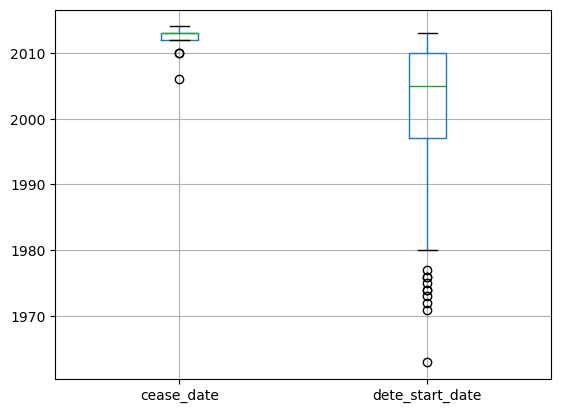

In [25]:
dete_resignations = dete_resignations.reset_index()
dete_resignations.boxplot(column = ['cease_date', 'dete_start_date'])

## Observations for DETE cease date and start date

From the boxplot above, 
* we can see the DETE distribution for `cease_date` is concentrated at around the decade of 2010 -2020 but no more than current year 2023.

* While the `dete_start_date` is distributed throughout 1960s to 2010, there were no years earlier than 1940. 

* We can also verify that no cease date comes before the start date, and can conclude the data is logically consistent.

<AxesSubplot:>

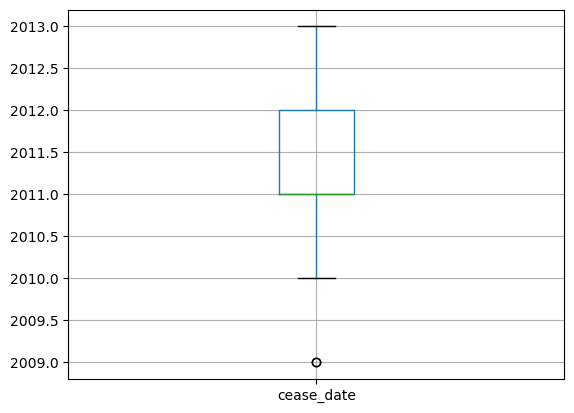

In [26]:
tafe_resignations = tafe_resignations.reset_index()
tafe_resignations.boxplot(column = ['cease_date'])

## Observations for TAFE cease date

* The `cease_date` does not go later than current year, with the concentration of `cease_date` around 2011 - 2012. There are no unrealistically high or low values.

* The years span between TAFE and DETE data are different, but because they are concentrated in the same decade, we will keep both data to prevent losing any accuracy.


## Creating employment period column for DETE

As our goal is to compare years of service, we see that TAFE data already has a `service` column which we have renamed as `institute_service`, while DETE data is missing such a dedicated column. We will create this column for DETE to ensure both data have standardised column names next.

In [27]:
dete_resignations['institute_service']= dete_resignations['cease_date'] - dete_resignations['dete_start_date']

#check column added
dete_resignations.head()

,index,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
0,3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
1,5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
2,8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
3,9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
4,11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


## Check for dissatisfaction -  create new column

The next part of our question investigates **whether the reason of resignation is due to disssatisfaction**. 

For TAFE data, we will consider `Contributing Factors. Dissatifaction` and `Contributing Factors. Job Dissatisfaction` columns as the key reasons for dissatisfaction and update the values into the following boolean values for ease of analysis.

`True` - indicating dissatisfaction was the reason for resignation
`False` - indicating there are other reasons for resignation
`NaN`  - indicating the value is missing values 

In [28]:
#checking value count for dissatisfaction columns
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
#checking value count for dissatisfaction columns
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We noticed there are only 2 variety of values for both columns i.e. `-` and `Contributing Factors. Dissatisfaction` or `Job Dissatisfaction`. To update these values into booleans, we will create a function `update_vals` to do the following:
* If the value is null, return `np.nan`. We will use the following criteria to check that a value is null: `pd.isnull(val)`.
* If the value is `'-'`, return `False`.
* For any other value, return `True`.

In [30]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True


In [31]:
#applymap update_vals to selected columns
#use df.any() to aggregate if any of the columns contain a True value, assign True to new dissatisfied column
#if none of columns contain True, then assign False
#if all columns contain NaN, then assign NaN

#create new df for new column
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'] = tafe_resignations_up.iloc[:, 11:13].applymap(update_vals).any(axis=1, skipna=False)

#test check
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)


False    241
True      99
Name: dissatisfied, dtype: int64

For DETE data, we can see the following columns are reasons contributing to resignation. We will create the same `dissatisfied` boolean results for these set of columns.

* `job_dissatisfaction` 
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

In [32]:
#inspect type of data in dissatisfied columns
columns_list = ['job_dissatisfaction', 
                'dissatisfaction_with_the_department',
                'physical_work_environment',
               'lack_of_recognition',
               'lack_of_job_security',
               'work_location',
               'employment_conditions',
               'work_life_balance',
               'workload']

dete_resignations['job_dissatisfaction'].value_counts(dropna=False)

False    270
True      41
Name: job_dissatisfaction, dtype: int64

From the sample count, we can see that the selected columns in DETE data are already boolean values, and there is no `NaN` values to convert. We will proceed to create the `dissatisfied` column in DETE data.

In [33]:
#use df.any() to aggregate if any of the columns contain a True value, assign True to new dissatisfied column
#if none of columns contain True, then assign False
#if all columns contain NaN, then assign NaN

dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'] = dete_resignations_up.loc[:, columns_list].any(axis=1, skipna=False)

#test check
dete_resignations_up['dissatisfied'].value_counts()


False    162
True     149
Name: dissatisfied, dtype: int64

# <font color='royalblue'>Data Cleaning Summary</font>

We have accomplished the following:
* Renamed our columns to standardise both datasets
* Dropped any data not needed for our analysis
* Verified the quality of our data by checking for inconsistencies in time period
* Created a new `institute_service` column to **aggregate employment period** in both datasets
* Cleaned the `Contributing Factors` columns into boolean values in TAFE dataset
* Created a new `dissatisfaction` column to **aggregate reason for resignation due to dissatisfaction** in both datasets

-----

# <font color='royalblue'>Data Transformation</font>

## Combining datasets

Next, we will combine our datasets, specifically according to the `institute_service` column. In order to distinguish between the two, we will add a column named `institute` to each dataframe, where each row will contain their corresponding value - `DETE` or `TAFE`.


In [34]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

#combine the 2 datasets using pd.concat vertically stacked to keep all data
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, ignore_index=True)

#test check 
combined['institute']

0      DETE
1      DETE
2      DETE
3      DETE
4      DETE
       ... 
646    TAFE
647    TAFE
648    TAFE
649    TAFE
650    TAFE
Name: institute, Length: 651, dtype: object

## Drop null columns with thresh parameter

Recall that we still have columns left that we don't need, let's check how many not null values there are to set the thresh parameter for our next step to drop columns.

In [35]:
#finding how many not null values the 'combined' dataframe contains
combined.notnull().sum().sort_values(ascending=False)

index                                                  651
separationtype                                         651
id                                                     651
dissatisfied                                           651
institute                                              651
cease_date                                             635
age                                                    596
institute_service                                      563
Institute                                              340
WorkArea                                               340
Contributing Factors. Career Move - Self-employment    332
Contributing Factors. Career Move - Public Sector      332
Contributing Factors. Career Move - Private Sector     332
Contributing Factors. Ill Health                       332
Contributing Factors. Maternity/Family                 332
Contributing Factors. Dissatisfaction                  332
Contributing Factors. Job Dissatisfaction              3

We can see the main columns that are our focus in the analysis have notnull values of 563 and above. We will set the thresh parameter to 500 to round off.

In [36]:
#drop columns containing more than 500 null values
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated.head()

,index,id,separationtype,cease_date,age,institute_service,dissatisfied,institute
0,3,4.0,Resignation-Other reasons,2012.0,36-40,7.0,False,DETE
1,5,6.0,Resignation-Other reasons,2012.0,41-45,18.0,True,DETE
2,8,9.0,Resignation-Other reasons,2012.0,31-35,3.0,False,DETE
3,9,10.0,Resignation-Other employer,2012.0,46-50,15.0,True,DETE
4,11,12.0,Resignation-Move overseas/interstate,2012.0,31-35,3.0,False,DETE


## Re-define institute_service column into categories

From the combined data, we can see that `institute_service` needs to be cleaned before we can proceed to analysis. The format of number of years are not standardised, and to do so, we will convert the data based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) into categorical career stages that better reflect employee's needs instead of age.

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [37]:
#change institute_service values into string types
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)


#check unique values of institute_service
combined_updated['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [38]:
#extract one digit or more
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r"(\d+)")

#check no digits are missed
combined_updated['institute_service'].value_counts(dropna=False)

1      159
NaN     88
3       83
5       56
7       34
11      30
0       20
20      17
6       17
4       16
2       14
9       14
13       8
8        8
15       7
17       6
10       6
12       6
22       6
14       6
18       5
16       5
24       4
23       4
21       3
19       3
39       3
32       3
25       2
28       2
30       2
26       2
36       2
29       1
34       1
27       1
42       1
35       1
41       1
49       1
33       1
38       1
31       1
Name: institute_service, dtype: int64

In [39]:
#convert data back to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

In [40]:
#create function that maps each year value to one of career stages above

def map_val(val):
    if pd.isnull(val):
        return np.nan
    if val < 3:
        return 'New'
    if val >= 3 and val <= 6:
        return 'Experienced'
    if val >= 7 and val <= 10:
        return 'Established'
    if val >= 11:
        return 'Veteran'

#apply function to institute_service and assign to new column 'service_cat'
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_val)

#check new column
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Aggregate percentage of people who are dissatisfied in each service category

* As the `dissatisfied` column currently consists of Boolean values and still some missing values, we will fill the missing values with the most commonly found value.

* After which we will use a pivot table to calculate percentage of people who are dissatisfied in each service category. A pivot table will convert boolean into integers i.e True is 1 and False is 0, this will allow us to calculate the mean which is equivalent to percentage since there are only 1s and 0s values.

In [41]:
#confirm number of True and False in dissatisfied colum
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [42]:
#replace missing values in dissatisfied column with value that occurs most frequently
combined_updated['dissatisfied'].fillna(False, inplace=True)

#check
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [43]:
#create pivot table to calculate percentage of dissatisfied employees in each service_cat group
#mean is equivalent to percentage since True = 1
combined_pivottable = combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.mean)
combined_pivottable

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


# <font color='royalblue'>Visualising Dissatisfaction by years of service</font>

<AxesSubplot:title={'center':'Dissatifaction by % in years of service'}, xlabel='service_cat'>

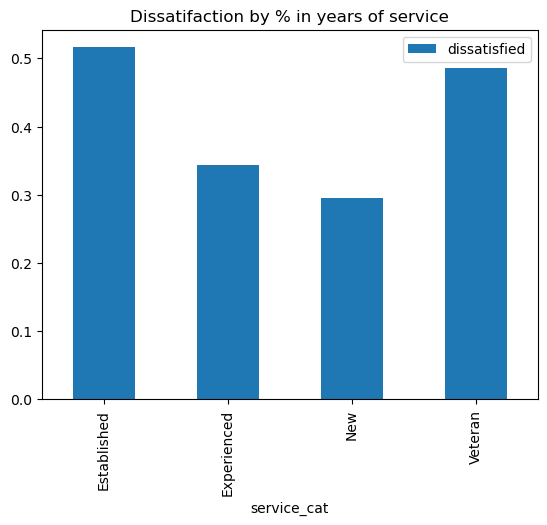

In [44]:
combined_pivottable.plot(kind='bar', title='Dissatifaction by % in years of service')

<AxesSubplot:title={'center':'Dissatifaction by number in years of service'}, xlabel='service_cat'>

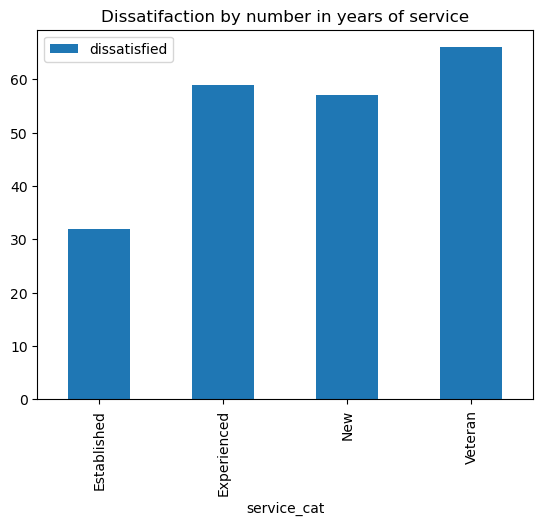

In [45]:
combined_pivottable2 = combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)
combined_pivottable2.plot(kind='bar', title='Dissatifaction by number in years of service')

# <font color='royalblue'>Initial conclusion</font>

From the above visualisation, by percentage we can see that for 
* **By percentage**, `Established` and `Veteran` category appears to have the highest resignation due to dissatisfaction around 50% and less so for `Experienced` - 35% and `New` - 30%. 


* However **by numbers**, we can see that `Established` has the lowest number with 30 employees only. While the difference between `Experienced`,`New` and `Veteran` is only about 5 employees. 


* This preliminary observation suggests that dissatisfaction is a strong reason for resignation in the longer serving group, but **longer employment does not directly equate to more dissatisfied employees**. Other reasons such as age and career development(destination after resignation) may be able to shed some light. Let's analyse age groups next.
------

# <font color='royalblue'>Dissatisfaction by Age</font>


In [46]:
# combine age column into series
combined_age = pd.concat([dete_resignations_up['age'], tafe_resignations_up['age']], axis=0)

#convert age series into dataframe
combined_age_df = pd.DataFrame(combined_age)

# assign age column to combined_updated data
combined_updated_age = pd.concat([combined_updated, combined_age_df], axis=0, ignore_index=False)

combined_updated_age.head()

,index,id,separationtype,cease_date,age,institute_service,dissatisfied,institute,service_cat
0,3.0,4.0,Resignation-Other reasons,2012.0,36-40,7.0,False,DETE,Established
1,5.0,6.0,Resignation-Other reasons,2012.0,41-45,18.0,True,DETE,Veteran
2,8.0,9.0,Resignation-Other reasons,2012.0,31-35,3.0,False,DETE,Experienced
3,9.0,10.0,Resignation-Other employer,2012.0,46-50,15.0,True,DETE,Veteran
4,11.0,12.0,Resignation-Move overseas/interstate,2012.0,31-35,3.0,False,DETE,Experienced


In [47]:
#unique values of ages
combined_updated_age['age'].value_counts(dropna=False)

51-55            142
NaN              110
41-45             96
41  45            90
46-50             84
36-40             82
46  50            78
26-30             70
21  25            66
36  40            64
31  35            64
26  30            64
21-25             58
31-35             58
56 or older       58
56-60             52
61 or older       46
20 or younger     20
Name: age, dtype: int64

## Creating age range new column

We see that there is quite a number of age ranges or duplicates written in a different format. We will clean this and assign the results in another `age_cat` column. The following are the age range we are looking at creating:

* `<=20`
* `21 - 30`
* `31 - 40`
* `41 - 50`
* `51 - 60`
* `>60`

In [48]:
#create function to filter the data into their categories
def age_range(val):
    if pd.isnull(val):
        return np.nan
    if val <= 20:
        return '20 or less'
    if val > 20 and val <31:
        return '21 - 30'
    if val > 30 and val <41:
        return '31 - 40'    
    if val > 40 and val <51:
        return '41 - 50' 
    if val > 50 and val <61:
        return '51 - 60'      
    if val > 60:
        return 'more than 60'  
    
#create new column age_cat to contain these age ranges
combined_updated_age['age_cat'] = combined_updated_age['age'].str.extract(r"(\d+)")
combined_updated_age['age_cat'] = combined_updated_age['age_cat'].astype(float)
combined_updated_age['age_cat'] = combined_updated_age['age_cat'].apply(age_range)
combined_updated_age['age_cat'].value_counts(dropna=False)

41 - 50         348
31 - 40         268
21 - 30         258
51 - 60         252
NaN             110
more than 60     46
20 or less       20
Name: age_cat, dtype: int64

Let's create a pivot table and plot a bar chart between dissatisfaction and age categories next.

<AxesSubplot:xlabel='age_cat'>

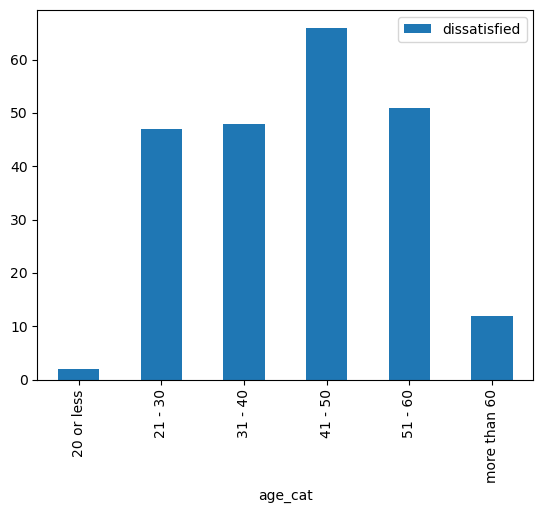

In [49]:
combined_age_pv = combined_updated_age.pivot_table(index='age_cat', values='dissatisfied', aggfunc=np.sum)
combined_age_pv.plot(kind='bar')

In [94]:
#creating a heatmap between age range, service years and dissatifaction
age_service_pv = pd.pivot_table(combined_updated_age,values='dissatisfied',index='age_cat',columns='service_cat',aggfunc= np.sum)
age_service_pv

service_cat,Established,Experienced,New,Veteran
age_cat,,,,
20 or less,NaN,1.0,1.0,NaN
21 - 30,6.0,18.0,19.0,NaN
31 - 40,13.0,14.0,14.0,6.0
41 - 50,8.0,18.0,14.0,24.0
51 - 60,4.0,7.0,9.0,27.0
more than 60,1.0,1.0,NaN,9.0


Text(0.5, 1.03, 'Portion of resignations dissatisfied by age and years of service')

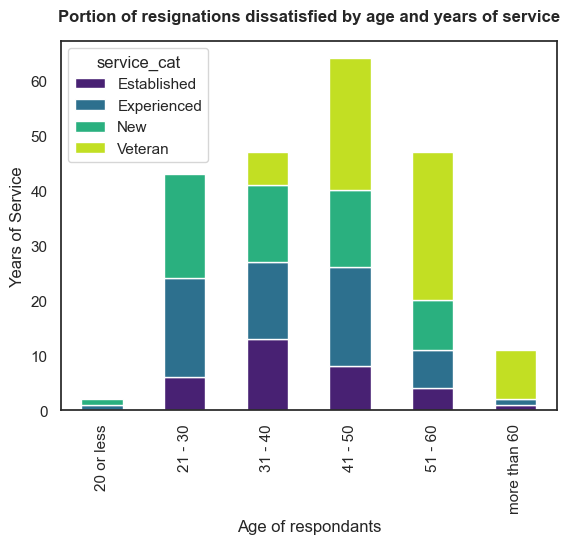

In [141]:
import seaborn as sns
from matplotlib.colors import ListedColormap

age_service_pv.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("viridis", 10)))
plt.xlabel('Age of respondants')
plt.ylabel('Years of Service')
plt.title('Portion of resignations dissatisfied by age and years of service', weight='bold', y=1.03)

# <font color='royalblue'>Age and service period conclusion</font>

We can see from the stacked bar chart combining both age and service period, 

* Age range between **41 -50 and 51-60 `Veteran` has the highest number of resignations due to dissatisfication**. This group of people have been with the company for more than 11 years experience if they have started working for the company in their 20-30s. This is also the age bracket where employees with significant experience value may seek other opportunities outside of the current company if they felt they cannot progress further in the same company. 

* For middle age group 31-40, across all service period, it seems the dissatifaction level is the same, about 50%. 

* For the younger age group below 30, the rationale for resignation due to dissatifaction may be justified as they have less inertia to move to another company once they find the current one a bad fit. It is those with greater loyalty and experience value that demands more investigation to understand why there is a talent drain. 

It would be useful to analyse the DETE and TAFE survey seperately next to find out more push factors specific to each organisation.

-----

# <font color='royalblue'>TAFE Push factor for age 41 - 50 veterans to resign</font>

In [51]:
tafe_age_service = combined_updated_age[(combined_updated_age['age_cat']== '41 - 50')
                                        & (combined_updated_age['service_cat']== 'Veteran')
                                        & (combined_updated_age['institute']== 'TAFE')]
tafe_age_service.shape

(9, 10)

In [52]:
#concat previously dropped factors columns to updated TAFE survey df
tafe_factors = tafe_survey.iloc[:,17:30]
tafe_factor_survey = pd.concat([tafe_survey_updated, tafe_factors], axis=1)

#inner join merge selected Resignation group df to factor df to extract selected rows with Resignation only
tafe_select = pd.merge(left=tafe_age_service, right=tafe_factor_survey, how='inner', on='id')
tafe_select_factors = tafe_select.iloc[:, 33:45]


#rename the columns 
factors_rename = {'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction'
                 : '1_leadership_vision',
                 'InstituteViews. Topic:2. I was given access to skills training to help me do my job better'
                 : '2_skills_training',
                 'InstituteViews. Topic:3. I was given adequate opportunities for personal development'
                 :'3_personal_development',
                 'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%'
                 :'4_promotion',
                 'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had'
                 : '5_salary_satisfaction',
                 'InstituteViews. Topic:6. The organisation recognised when staff did good work'
                 : '6_recognition',
                 'InstituteViews. Topic:7. Management was generally supportive of me'
                 : '7_management_support_me',
                 'InstituteViews. Topic:8. Management was generally supportive of my team'
                 : '8_management_support_team',
                 'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me'
                 : '9_informed_changes',
                 'InstituteViews. Topic:10. Staff morale was positive within the Institute'
                 : '10_staff_morale_positive',
                 'InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly'
                 : '11_Issue_quick_resolved',
                 'InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently'
                 : '12_Issue_efficient_resolved'}

tafe_select_factors.rename(columns=factors_rename, inplace=True)
tafe_select_factors

,1_leadership_vision,2_skills_training,3_personal_development,4_promotion,5_salary_satisfaction,6_recognition,7_management_support_me,8_management_support_team,9_informed_changes,10_staff_morale_positive,11_Issue_quick_resolved,12_Issue_efficient_resolved
0,Strongly Disagree,Agree,Agree,Not Applicable,Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Agree,Strongly Disagree,Agree,Agree
1,Neutral,Neutral,Neutral,Neutral,Agree,Disagree,Disagree,Disagree,Neutral,Strongly Disagree,Strongly Disagree,Strongly Disagree
2,Neutral,Agree,Neutral,Neutral,Strongly Disagree,Neutral,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral
3,Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree
4,Neutral,Neutral,Agree,Disagree,Neutral,Neutral,Agree,Agree,Neutral,Neutral,Neutral,Neutral
5,Neutral,Neutral,Disagree,Disagree,Strongly Disagree,Disagree,Neutral,Neutral,Disagree,Disagree,Disagree,Neutral
6,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Agree
7,Strongly Agree,Agree,Agree,Neutral,Disagree,Agree,Agree,Agree,Agree,Neutral,NaN,NaN
8,Strongly Disagree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Disagree,Agree,Agree


We can see there is a large range of differing opinions across these 9 employees. Let's convert these columns into percentage numerics to generate a visualisation to represent the general sentiments better.


In [53]:
#sample value count for each column
tafe_select_factors['1_leadership_vision'].value_counts(normalize=True)*100

Neutral              44.444444
Strongly Disagree    22.222222
Agree                22.222222
Strongly Agree       11.111111
Name: 1_leadership_vision, dtype: float64

In [54]:
#create function to apply to whole dataframe
def percent_count(col):
    agree_percentage = col.value_counts(normalize=True)*100
    return round(agree_percentage)

#apply function to each column - axis=0
tafe_select_factors_percent = tafe_select_factors.apply(percent_count, axis=0)
tafe_select_factors_percent
    

,1_leadership_vision,2_skills_training,3_personal_development,4_promotion,5_salary_satisfaction,6_recognition,7_management_support_me,8_management_support_team,9_informed_changes,10_staff_morale_positive,11_Issue_quick_resolved,12_Issue_efficient_resolved
Agree,22.0,44.0,56.0,22.0,44.0,22.0,22.0,33.0,56.0,11.0,38.0,38.0
Disagree,NaN,NaN,11.0,22.0,11.0,22.0,11.0,11.0,22.0,11.0,12.0,NaN
Neutral,44.0,33.0,22.0,33.0,11.0,22.0,22.0,22.0,22.0,33.0,25.0,38.0
Not Applicable,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strongly Agree,11.0,11.0,NaN,NaN,NaN,11.0,33.0,11.0,NaN,NaN,NaN,NaN
Strongly Disagree,22.0,11.0,11.0,11.0,33.0,22.0,11.0,22.0,NaN,44.0,25.0,25.0


In [131]:
tafe_select_factors_percent_disagree = tafe_select_factors_percent[(tafe_select_factors_percent.index =='Disagree') | (tafe_select_factors_percent.index =='Strongly Disagree')]
tafe_select_factors_percent_disagree    

,1_leadership_vision,2_skills_training,3_personal_development,4_promotion,5_salary_satisfaction,6_recognition,7_management_support_me,8_management_support_team,9_informed_changes,10_staff_morale_positive,11_Issue_quick_resolved,12_Issue_efficient_resolved
Disagree,NaN,NaN,11.0,22.0,11.0,22.0,11.0,11.0,22.0,11.0,12.0,NaN
Strongly Disagree,22.0,11.0,11.0,11.0,33.0,22.0,11.0,22.0,NaN,44.0,25.0,25.0


As above, we have aggregated a dataframe showing percentage representations of feedbacks in each factor column. Next, generate a heatmap study the distribution across all factors.

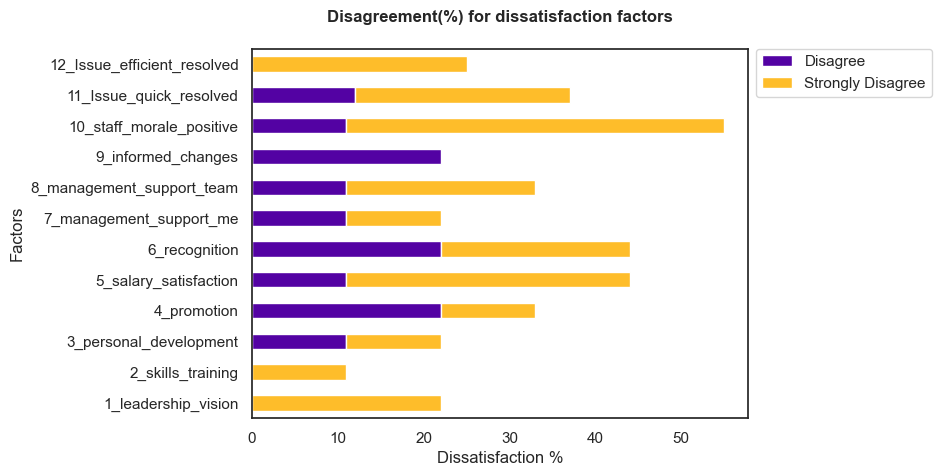

In [138]:
import matplotlib

# fig, ax = plt.subplots()

tafe_select_factors_percent_disagree.transpose().plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("plasma")))
plt.xlabel('Dissatisfaction %')
plt.ylabel('Factors')
plt.title('Disagreement(%) for dissatisfaction factors', weight='bold', size=12, y=1.05)

plt.legend(loc='best', bbox_to_anchor=(1, 1.02))



# <font color='royalblue'>Dissatisfaction factors conclusion</font>

Recall that we are investigating the dissatisfaction factors, so we will focus on looking at the `Strongly Disagree` and `Disagree` components. 

From the chart above, we can see that:

* there is a strikingly **high disagreement for `10_staff_morale_positive` at about 45%**, followed by `5_salary_satisfaction`at about 33%. These seem to suggest there are fundamental issues with the workplace culture that employees are feeling under appreciated.

* The factors surrounding `1_leadership_vision`, `12_issue_efficient_resolved`, `8_management_support_team` and `6_recognition` all at about 25% also support a background story that the lack of leadership management/direction may be the reason why employees who have worked there for a long time are feeling underappreciated. The management may need to look into these gaps in order to retain experienced talents.